In [1]:
import os
import pandas as pd
import matplotlib
import numpy as np
import scipy.stats as st

os.getcwd()
os.chdir('C:\\Users\dsk1113282\Desktop\PyWorkPlace\\timesheet\\analytic_works\monte carlo')
os.listdir()


dataset_all=pd.read_excel('grade_d.xlsx',sheet_name='Sheet1')
dataset=dataset_all[dataset_all["Deger"]>0]
dataset

,Tarih,Deger
0,2020-09-07,60.256410
1,2020-09-14,70.416667
2,2020-09-21,43.125000
3,2020-09-28,47.413793
4,2020-10-05,62.916667
...,...,...
59,2021-11-29,88.750000
60,2021-12-06,81.875000
61,2021-12-13,44.444444
62,2021-12-20,57.031250


In [2]:
# dataset i doldurduktan sonra ilk bu çalışacak.. grafik çizimine gerek yok
#  her dağılım için case when ile random generator, ayarlanmalı, her dağılımın parametre sayısı vs... değişiyor çünkü
dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme","lognorm","expon","t"]
dist_results = []
params = {}
    
for dist_name in dist_names:
    dist = getattr(st, dist_name)
    param = dist.fit(dataset["Deger"])

    params[dist_name] = param
    # Applying the Kolmogorov-Smirnov test
    D, p = st.kstest(dataset["Deger"], dist_name, args=param)
#     print("p value for "+dist_name+" = "+str(p))
    dist_results.append((dist_name, p))

# select the best fitted distribution
best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
# store the name of the best fit and its p value

print("Best fitting distribution: "+str(best_dist))
print("Best p value: "+ str(best_p))
print("Parameters for the best fit: "+ str(params[best_dist]))
result_param=str(params[best_dist])
    
# best_dist
# list_best_params=list(params[best_dist])
# list_best_params


C:\Users\dsk1113282\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1677: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
C:\Users\dsk1113282\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\dsk1113282\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2666: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


Best fitting distribution: t
Best p value: 0.9011554353594728
Parameters for the best fit: (6946881.773386893, 78.82878978247578, 15.558523147370746)


In [3]:
from scipy.stats import norm,t
import pandas as pd

# x=norm.rvs(loc=79.64, scale=14.77, size=10000)
x=t.rvs(df=6946881.773386893,loc=78.82878978247578, scale=15.558523147370746, size=10000)
DataSetSim=pd.DataFrame({'SimValues':x} )

DataSetSim.index.name = 'Id'
DataSetSim



,SimValues
Id,
0,83.652253
1,78.894855
2,76.424613
3,75.410721
4,49.748262
...,...
9995,68.024764
9996,87.052361
9997,78.924859


In [4]:
# DataSetSim.to_excel (r'grade_d_sim_values.xlsx', index = False, header=True)

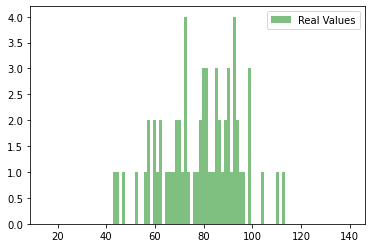

In [4]:
import random
import numpy
from matplotlib import pyplot

bins = numpy.linspace(15, 140, 100)

pyplot.hist(dataset["Deger"], bins, alpha=0.5, label='Real Values',color = "green")
pyplot.legend(loc='upper right')
pyplot.show()

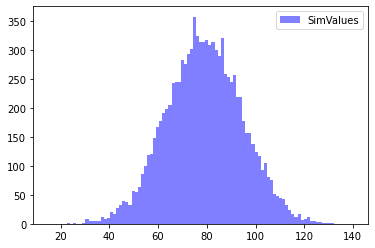

In [5]:
import random
import numpy
from matplotlib import pyplot

bins = numpy.linspace(15, 140, 100)

pyplot.hist(DataSetSim["SimValues"], bins, alpha=0.5, label='SimValues',color = "blue")
# pyplot.hist(dataset["Deger"], bins, alpha=0.5, label='y',color = "green")
pyplot.legend(loc='upper right')
pyplot.show()

In [6]:
DataSetSim.describe()

,SimValues
count,10000.000000
mean,79.533636
std,14.811536
min,20.255965
25%,69.570332
50%,79.645862
75%,89.529596
max,140.810633
